<a href="https://colab.research.google.com/github/deedeeharris/MS_Research_Projects/blob/main/2_Irrigation_Failures/stress_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Irrigation Failure Analysis

Yedidya Harris, 13/04/2023

## Li-600 (Porometer) analysis

##### helper functions and file paths

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# import relevant libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = r'/content/drive/MyDrive/LabFiles/data'
plant_ids_data =  r'/content/drive/MyDrive/LabFiles/data/frostroom2/plantsID.xlsx'

In [50]:
# Function to read and clean LI-COR LI-600 CSV files
def csv_li600_to_df(csv_filepath):
  # Read CSV file into a DataFrame
  df = pd.read_csv(csv_filepath)

  # set column names to first row values
  df.columns = df.iloc[0]
  df = df[0:]

  # Drop the first and second rows
  df = df.drop([0,1])

  # Select the desired columns
  df = df[['Plant ID', 'Time', 'Date', 'gsw', 'E_apparent', 'Tleaf', 'Qamb']]

  # Convert the 'gsw', 'E_apparent', 'Tleaf', and 'Qamb' columns to numeric
  numeric_cols = ['Plant ID', 'gsw', 'E_apparent', 'Tleaf', 'Qamb']
  df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

  # Combine the 'Date' and 'Time' columns and convert to a datetime
  datetime_col = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
  df['Timestamp'] = datetime_col


  # Drop the original 'Date' and 'Time' columns
  df = df.drop(['Date', 'Time'], axis=1)

  # rename cols
  df = df.rename(columns={
      'Plant ID': 'Plant ID',
      'Timestamp': 'Timestamp',
      'gsw': 'Stomatal Conductance (mol/m²/s)',
      'E_apparent': 'Transpiration  (mmol/m²/s)',
      'Tleaf': 'Leaf Tempurature (°C)',
      'Qamb': 'PAR (µmol/m²/s)'
  })
  return df


In [51]:
def merge_csv_files_to_df(csv_filepaths):
    dfs = []
    for filepath in csv_filepaths:
      df = csv_li600_to_df(filepath)
      dfs.append(df)
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df


### Stress Days 29-30/03/2023

In [52]:
# paths
current_licor_folder = r'/content/drive/MyDrive/LabFiles/data/frostroom2/stressdays_2930_03_2023/licor'
licor_file_day1 = f'{current_licor_folder}/LICOR_29032023_frostroom_C_T1_T4.csv'

In [53]:
# read and clean our licor files
csv_file_paths = [licor_file_day1]
df = merge_csv_files_to_df(csv_file_paths)
df

,Plant ID,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Tempurature (°C),PAR (µmol/m²/s),Timestamp
0,1,0.523019,4.491076,21.76,643,2023-03-29 09:38:33
1,1,0.506124,4.925668,22.69,600,2023-03-29 09:39:00
2,1,0.489590,4.628263,22.58,647,2023-03-29 09:39:18
3,1,0.577256,5.218382,22.86,724,2023-03-29 09:39:37
4,2,0.477084,4.634845,23.16,491,2023-03-29 09:40:00
...,...,...,...,...,...,...
199,55,0.629865,5.830357,27.23,1209,2023-03-29 13:20:35
200,55,0.801385,5.679715,26.29,420,2023-03-29 13:21:38
201,55,0.811505,5.651643,26.18,606,2023-03-29 13:22:01
202,55,0.604267,5.286377,26.82,1035,2023-03-29 13:22:21


In [54]:
# read in plant id df
df_ids = pd.read_excel(plant_ids_data, dtype=object)
df_ids['Plant ID'] = df_ids['Plant ID'].apply(pd.to_numeric, errors='coerce')

In [55]:
df_ids.columns

Index(['Plant ID', 'Variety', 'Treatment'], dtype='object')

In [56]:
# map the details from df_ids to df based on plant id
df['Treatment'] = df['Plant ID'].map(df_ids.set_index('Plant ID')['Treatment'])
df['Variety'] = df['Plant ID'].map(df_ids.set_index('Plant ID')['Variety'])


In [57]:
df

,Plant ID,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Tempurature (°C),PAR (µmol/m²/s),Timestamp,Treatment,Variety
0,1,0.523019,4.491076,21.76,643,2023-03-29 09:38:33,T1,Mohammed
1,1,0.506124,4.925668,22.69,600,2023-03-29 09:39:00,T1,Mohammed
2,1,0.489590,4.628263,22.58,647,2023-03-29 09:39:18,T1,Mohammed
3,1,0.577256,5.218382,22.86,724,2023-03-29 09:39:37,T1,Mohammed
4,2,0.477084,4.634845,23.16,491,2023-03-29 09:40:00,T1,Mohammed
...,...,...,...,...,...,...,...,...
199,55,0.629865,5.830357,27.23,1209,2023-03-29 13:20:35,T4,Hahms Gelbe
200,55,0.801385,5.679715,26.29,420,2023-03-29 13:21:38,T4,Hahms Gelbe
201,55,0.811505,5.651643,26.18,606,2023-03-29 13:22:01,T4,Hahms Gelbe
202,55,0.604267,5.286377,26.82,1035,2023-03-29 13:22:21,T4,Hahms Gelbe


In [58]:
df.columns

Index(['Plant ID', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)', 'Leaf Tempurature (°C)',
       'PAR (µmol/m²/s)', 'Timestamp', 'Treatment', 'Variety'],
      dtype='object', name=0)

In [59]:
df_ana = df[['Plant ID', 'Variety', 'Treatment', 'Timestamp', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)', 'Leaf Tempurature (°C)',
       'PAR (µmol/m²/s)']].copy()

df_ana

,Plant ID,Variety,Treatment,Timestamp,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Tempurature (°C),PAR (µmol/m²/s)
0,1,Mohammed,T1,2023-03-29 09:38:33,0.523019,4.491076,21.76,643
1,1,Mohammed,T1,2023-03-29 09:39:00,0.506124,4.925668,22.69,600
2,1,Mohammed,T1,2023-03-29 09:39:18,0.489590,4.628263,22.58,647
3,1,Mohammed,T1,2023-03-29 09:39:37,0.577256,5.218382,22.86,724
4,2,Mohammed,T1,2023-03-29 09:40:00,0.477084,4.634845,23.16,491
...,...,...,...,...,...,...,...,...
199,55,Hahms Gelbe,T4,2023-03-29 13:20:35,0.629865,5.830357,27.23,1209
200,55,Hahms Gelbe,T4,2023-03-29 13:21:38,0.801385,5.679715,26.29,420
201,55,Hahms Gelbe,T4,2023-03-29 13:22:01,0.811505,5.651643,26.18,606
202,55,Hahms Gelbe,T4,2023-03-29 13:22:21,0.604267,5.286377,26.82,1035


In [60]:
# Divide each measurement in the 'gsw' and 'E_apparent' columns by the corresponding 'Qamb' value
df_ana['Stomatal Conductance (normalized by PAR)'] = df_ana['Stomatal Conductance (mol/m²/s)'] / df_ana['PAR (µmol/m²/s)']
df_ana['Transpiration (normalized by PAR)'] = df_ana['Transpiration  (mmol/m²/s)'] / df_ana['PAR (µmol/m²/s)']


In [61]:
df_ana

,Plant ID,Variety,Treatment,Timestamp,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Tempurature (°C),PAR (µmol/m²/s),Stomatal Conductance (normalized by PAR),Transpiration (normalized by PAR)
0,1,Mohammed,T1,2023-03-29 09:38:33,0.523019,4.491076,21.76,643,0.000813,0.006985
1,1,Mohammed,T1,2023-03-29 09:39:00,0.506124,4.925668,22.69,600,0.000844,0.008209
2,1,Mohammed,T1,2023-03-29 09:39:18,0.489590,4.628263,22.58,647,0.000757,0.007153
3,1,Mohammed,T1,2023-03-29 09:39:37,0.577256,5.218382,22.86,724,0.000797,0.007208
4,2,Mohammed,T1,2023-03-29 09:40:00,0.477084,4.634845,23.16,491,0.000972,0.009440
...,...,...,...,...,...,...,...,...,...,...
199,55,Hahms Gelbe,T4,2023-03-29 13:20:35,0.629865,5.830357,27.23,1209,0.000521,0.004822
200,55,Hahms Gelbe,T4,2023-03-29 13:21:38,0.801385,5.679715,26.29,420,0.001908,0.013523
201,55,Hahms Gelbe,T4,2023-03-29 13:22:01,0.811505,5.651643,26.18,606,0.001339,0.009326
202,55,Hahms Gelbe,T4,2023-03-29 13:22:21,0.604267,5.286377,26.82,1035,0.000584,0.005108


In [62]:
# Group the data by plant ID and timestamp
df_ana_grouped = df_ana.groupby(['Plant ID', pd.Grouper(key='Timestamp', freq='D')])

# Calculate the mean of each x-hour period for the two normalized columns
df_ana_norm_mean = df_ana_grouped[['Stomatal Conductance (normalized by PAR)', 'Transpiration (normalized by PAR)']].mean()

# Reset the index to make the timestamp a column again
df_ana_norm_mean = df_ana_norm_mean.reset_index()

# sort by col "Plant ID"
df_ana_norm_mean.sort_values(by='Plant ID', inplace=True)

In [63]:
# sort by col "Plant ID"
df_ana_norm_mean.sort_values(by='Plant ID', inplace=True)

# map the details from df_ids to df based on plant id
df_ana_norm_mean['Treatment'] = df_ana_norm_mean['Plant ID'].map(df_ids.set_index('Plant ID')['Treatment'])
df_ana_norm_mean['Variety'] = df_ana_norm_mean['Plant ID'].map(df_ids.set_index('Plant ID')['Variety'])

In [105]:
df_ana_norm_mean

,Plant ID,Timestamp,Stomatal Conductance (normalized by PAR),Transpiration (normalized by PAR),Treatment,Variety
0,1,2023-03-29,0.001894,0.014133,T1,Mohammed
1,2,2023-03-29,0.001792,0.013479,T1,Mohammed
2,3,2023-03-29,0.002200,0.014969,T1,Mohammed
3,4,2023-03-29,0.000484,0.004096,T1,Mohammed
4,5,2023-03-29,0.000717,0.005072,T1,Mohammed
5,6,2023-03-29,0.003658,0.025104,T1,Hahms Gelbe
6,7,2023-03-29,0.002676,0.016677,T1,Hahms Gelbe
7,8,2023-03-29,0.000864,0.006292,T1,Hahms Gelbe
8,9,2023-03-29,0.000833,0.006476,T1,Hahms Gelbe
9,10,2023-03-29,0.001201,0.009349,T1,Hahms Gelbe


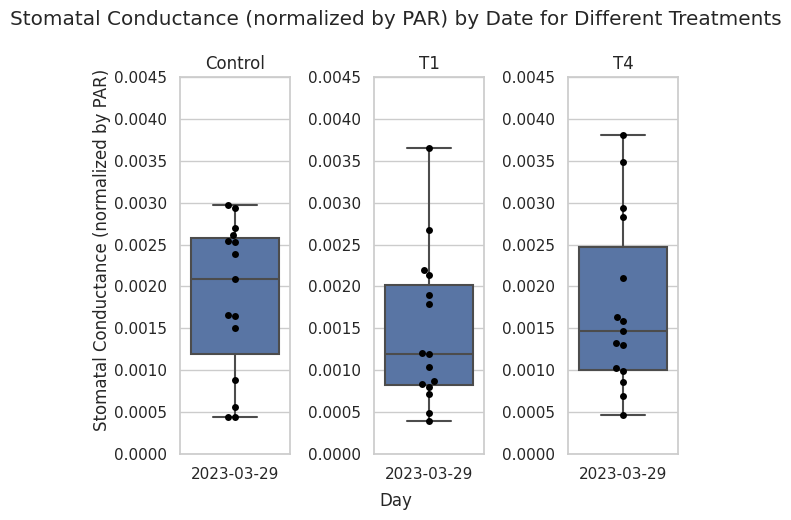

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# get unique treatments
treatments = sorted(df_ana_norm_mean.Treatment.unique())

# create subplot with the number of treatments as columns
fig, axs = plt.subplots(nrows=1, ncols=len(treatments), figsize=(2*len(treatments), 5))

# loop through treatments and create subplots
for i, treatment in enumerate(treatments):
  
  # filter data by treatment
  df_t = df_ana_norm_mean.copy().loc[df_ana_norm_mean['Treatment'] == treatment]

  # convert timestamp to date only
  df_t['Timestamp'] = pd.to_datetime(df_t['Timestamp']).dt.date

  # create boxplot and swarmplot in the corresponding subplot
  sns.boxplot(x='Timestamp', y='Stomatal Conductance (normalized by PAR)', data=df_t, ax=axs[i])
  sns.swarmplot(x='Timestamp', y='Stomatal Conductance (normalized by PAR)', data=df_t, color='black', ax=axs[i])
  axs[i].set_xticklabels(df_t['Timestamp'].unique()) #,rotation=90
  axs[i].set_title(f'{treatment}')
  axs[i].set_xlabel('')
  axs[i].set_ylabel('')
  axs[i].set_ylim(0, 0.0045)

#add a general xy-axis label
fig.text(0.01, 0.5, 'Stomatal Conductance (normalized by PAR)', ha='center', va='center', rotation='vertical')
fig.text(0.5, -0.02, 'Day', ha='center', va='bottom')


#add a general title for the entire figure
fig.suptitle('Stomatal Conductance (normalized by PAR) by Date for Different Treatments')

# adjust subplot spacing
fig.tight_layout()

# show plot
plt.show()


In [66]:
# grouped by treatment
df_treatment_mean = df_ana_norm_mean.groupby(['Treatment', 'Timestamp'])['Stomatal Conductance (normalized by PAR)', 'Transpiration (normalized by PAR)'].mean().reset_index()
df_treatment_mean_sorted = df_treatment_mean.sort_values(by='Timestamp')

df_treatment_mean_sorted

<ipython-input-66-c61dd74fa809>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_treatment_mean = df_ana_norm_mean.groupby(['Treatment', 'Timestamp'])['Stomatal Conductance (normalized by PAR)', 'Transpiration (normalized by PAR)'].mean().reset_index()


,Treatment,Timestamp,Stomatal Conductance (normalized by PAR),Transpiration (normalized by PAR)
0,Control,2023-03-29,0.001859,0.013018
1,T1,2023-03-29,0.001459,0.010643
2,T4,2023-03-29,0.001766,0.012469


In [67]:
df_means_29032023 = df_treatment_mean_sorted.copy()


In [68]:
df_means_29032023

,Treatment,Timestamp,Stomatal Conductance (normalized by PAR),Transpiration (normalized by PAR)
0,Control,2023-03-29,0.001859,0.013018
1,T1,2023-03-29,0.001459,0.010643
2,T4,2023-03-29,0.001766,0.012469


### Stress Days 02-04/04/2023

In [196]:
# paths
current_licor_folder = r'/content/drive/MyDrive/LabFiles/data/frostroom2/stressdays_0203_04_2023/licor'
licor_file_day1 = f'{current_licor_folder}/LICOR_02042023_frostroom_C_T1_T4.csv'
licor_file_day2 = f'{current_licor_folder}/LICOR_03042023_frostroom_C_T1_T4.csv'
licor_file_day3 = f'{current_licor_folder}/LICOR_04042023_frostroom_C_T1_T4.csv'

In [197]:
# read and clean our licor files
csv_file_paths = [licor_file_day1, licor_file_day2, licor_file_day3]
df = merge_csv_files_to_df(csv_file_paths)
df

,Plant ID,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Tempurature (°C),PAR (µmol/m²/s),Timestamp
0,61,0.656855,4.871182,21.54,369,2023-04-02 09:26:29
1,61,0.283426,2.812726,22.01,333,2023-04-02 09:26:46
2,61,0.211943,2.406864,22.78,406,2023-04-02 09:26:57
3,61,0.253120,2.632516,22.46,372,2023-04-02 09:27:08
4,61,0.385704,3.421965,22.10,351,2023-04-02 09:27:18
...,...,...,...,...,...,...
298,75,0.768058,7.866569,26.15,1138,2023-04-04 12:08:19
299,75,0.160120,2.935892,27.47,1170,2023-04-04 12:08:28
300,75,0.535452,5.519504,24.92,955,2023-04-04 12:08:40
301,75,0.363588,4.393027,25.20,1022,2023-04-04 12:08:52


In [198]:
# read in plant id df
df_ids = pd.read_excel(plant_ids_data, dtype=object)
df_ids['Plant ID'] = df_ids['Plant ID'].apply(pd.to_numeric, errors='coerce')

In [199]:
df_ids.columns

Index(['Plant ID', 'Variety', 'Treatment'], dtype='object')

In [200]:
# map the details from df_ids to df based on plant id
df['Treatment'] = df['Plant ID'].map(df_ids.set_index('Plant ID')['Treatment'])
df['Variety'] = df['Plant ID'].map(df_ids.set_index('Plant ID')['Variety'])


In [201]:
df

,Plant ID,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Tempurature (°C),PAR (µmol/m²/s),Timestamp,Treatment,Variety
0,61,0.656855,4.871182,21.54,369,2023-04-02 09:26:29,Control,Mohammed
1,61,0.283426,2.812726,22.01,333,2023-04-02 09:26:46,Control,Mohammed
2,61,0.211943,2.406864,22.78,406,2023-04-02 09:26:57,Control,Mohammed
3,61,0.253120,2.632516,22.46,372,2023-04-02 09:27:08,Control,Mohammed
4,61,0.385704,3.421965,22.10,351,2023-04-02 09:27:18,Control,Mohammed
...,...,...,...,...,...,...,...,...
298,75,0.768058,7.866569,26.15,1138,2023-04-04 12:08:19,Control,Red Robin
299,75,0.160120,2.935892,27.47,1170,2023-04-04 12:08:28,Control,Red Robin
300,75,0.535452,5.519504,24.92,955,2023-04-04 12:08:40,Control,Red Robin
301,75,0.363588,4.393027,25.20,1022,2023-04-04 12:08:52,Control,Red Robin


In [202]:
df.columns

Index(['Plant ID', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)', 'Leaf Tempurature (°C)',
       'PAR (µmol/m²/s)', 'Timestamp', 'Treatment', 'Variety'],
      dtype='object', name=0)

In [203]:
df_ana = df[['Plant ID', 'Variety', 'Treatment', 'Timestamp', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)', 'Leaf Tempurature (°C)',
       'PAR (µmol/m²/s)']].copy()

df_ana

,Plant ID,Variety,Treatment,Timestamp,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Tempurature (°C),PAR (µmol/m²/s)
0,61,Mohammed,Control,2023-04-02 09:26:29,0.656855,4.871182,21.54,369
1,61,Mohammed,Control,2023-04-02 09:26:46,0.283426,2.812726,22.01,333
2,61,Mohammed,Control,2023-04-02 09:26:57,0.211943,2.406864,22.78,406
3,61,Mohammed,Control,2023-04-02 09:27:08,0.253120,2.632516,22.46,372
4,61,Mohammed,Control,2023-04-02 09:27:18,0.385704,3.421965,22.10,351
...,...,...,...,...,...,...,...,...
298,75,Red Robin,Control,2023-04-04 12:08:19,0.768058,7.866569,26.15,1138
299,75,Red Robin,Control,2023-04-04 12:08:28,0.160120,2.935892,27.47,1170
300,75,Red Robin,Control,2023-04-04 12:08:40,0.535452,5.519504,24.92,955
301,75,Red Robin,Control,2023-04-04 12:08:52,0.363588,4.393027,25.20,1022


In [204]:
# Divide each measurement in the 'gsw' and 'E_apparent' columns by the corresponding 'Qamb' value
df_ana['Stomatal Conductance (normalized by PAR)'] = df_ana['Stomatal Conductance (mol/m²/s)'] / df_ana['PAR (µmol/m²/s)']
df_ana['Transpiration (normalized by PAR)'] = df_ana['Transpiration  (mmol/m²/s)'] / df_ana['PAR (µmol/m²/s)']


In [205]:
df_ana

,Plant ID,Variety,Treatment,Timestamp,Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Leaf Tempurature (°C),PAR (µmol/m²/s),Stomatal Conductance (normalized by PAR),Transpiration (normalized by PAR)
0,61,Mohammed,Control,2023-04-02 09:26:29,0.656855,4.871182,21.54,369,0.001780,0.013201
1,61,Mohammed,Control,2023-04-02 09:26:46,0.283426,2.812726,22.01,333,0.000851,0.008447
2,61,Mohammed,Control,2023-04-02 09:26:57,0.211943,2.406864,22.78,406,0.000522,0.005928
3,61,Mohammed,Control,2023-04-02 09:27:08,0.253120,2.632516,22.46,372,0.000680,0.007077
4,61,Mohammed,Control,2023-04-02 09:27:18,0.385704,3.421965,22.10,351,0.001099,0.009749
...,...,...,...,...,...,...,...,...,...,...
298,75,Red Robin,Control,2023-04-04 12:08:19,0.768058,7.866569,26.15,1138,0.000675,0.006913
299,75,Red Robin,Control,2023-04-04 12:08:28,0.160120,2.935892,27.47,1170,0.000137,0.002509
300,75,Red Robin,Control,2023-04-04 12:08:40,0.535452,5.519504,24.92,955,0.000561,0.005780
301,75,Red Robin,Control,2023-04-04 12:08:52,0.363588,4.393027,25.20,1022,0.000356,0.004298


In [207]:
df_ana.columns

Index(['Plant ID', 'Variety', 'Treatment', 'Timestamp',
       'Stomatal Conductance (mol/m²/s)', 'Transpiration  (mmol/m²/s)',
       'Leaf Tempurature (°C)', 'PAR (µmol/m²/s)',
       'Stomatal Conductance (normalized by PAR)',
       'Transpiration (normalized by PAR)'],
      dtype='object', name=0)

In [208]:
# Group the data by plant ID and timestamp
df_ana_grouped = df_ana.groupby(['Plant ID', pd.Grouper(key='Timestamp', freq='D')])

# Calculate the mean of each x-hour period for the two normalized columns
df_ana_norm_mean = df_ana_grouped[['Stomatal Conductance (normalized by PAR)', 
                                   'Transpiration (normalized by PAR)',
                                   'Stomatal Conductance (mol/m²/s)', 
                                   'Transpiration  (mmol/m²/s)']].mean()

# Reset the index to make the timestamp a column again
df_ana_norm_mean = df_ana_norm_mean.reset_index()

# sort by col "Plant ID"
df_ana_norm_mean.sort_values(by='Plant ID', inplace=True)

In [209]:
# sort by col "Plant ID"
df_ana_norm_mean.sort_values(by='Plant ID', inplace=True)

# map the details from df_ids to df based on plant id
df_ana_norm_mean['Treatment'] = df_ana_norm_mean['Plant ID'].map(df_ids.set_index('Plant ID')['Treatment'])
df_ana_norm_mean['Variety'] = df_ana_norm_mean['Plant ID'].map(df_ids.set_index('Plant ID')['Variety'])

In [210]:
df_ana_norm_mean

,Plant ID,Timestamp,Stomatal Conductance (normalized by PAR),Transpiration (normalized by PAR),Stomatal Conductance (mol/m²/s),Transpiration (mmol/m²/s),Treatment,Variety
0,1,2023-04-02,0.000527,0.005283,0.366969,3.660045,T1,Mohammed
1,1,2023-04-03,0.000302,0.004114,0.403863,5.524749,T1,Mohammed
2,1,2023-04-04,0.000392,0.007297,0.568140,10.562538,T1,Mohammed
3,2,2023-04-02,0.000383,0.004303,0.276825,3.123058,T1,Mohammed
4,2,2023-04-03,0.000263,0.004229,0.392977,6.321631,T1,Mohammed
...,...,...,...,...,...,...,...,...
91,73,2023-04-04,0.000584,0.005967,0.609063,6.212994,Control,Red Robin
92,74,2023-04-03,0.000504,0.004547,0.527858,4.762925,Control,Red Robin
93,74,2023-04-04,0.000511,0.005834,0.519062,5.929370,Control,Red Robin
94,75,2023-04-03,0.000497,0.004439,0.560866,5.045955,Control,Red Robin


##### Statistics

In [222]:
'''
Function for Conducting Statistical Tests on Data by Day


Short:
For normally distributed data, t-tests are used to compare the means of two groups. 
In this function, two t-tests are performed: one comparing the mean of group T1 to the mean of group T4, 
and another comparing the mean of the Control group to the mean of group T4.

For non-normally distributed data, the Kruskal-Wallis test is used to compare the medians of two or more groups. 
In this function, the Kruskal-Wallis test is performed on all three treatment groups (T1, T4, and Control) 
if at least one of the groups is not normally distributed.

Long:
This function performs statistical analysis on a given feature for each day in a pandas DataFrame. 
The DataFrame contains data for different treatments, 
and the function compares the treatments using either a t-test or Kruskal-Wallis test, 
depending on whether the data is normally distributed or not. 
For each day, the function checks if the data is normally distributed for each treatment using the Shapiro-Wilk test, 
and then performs the appropriate test accordingly. The results of the tests are printed in a table, 
which includes the date, test type, comparison, statistic, p-value, and significance level. 
If a treatment group has less than three observations for a given day, the test is not performed and "N/A" is printed in the table.
'''

from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from tabulate import tabulate

def stats_byday(df_ana_norm_mean, feature):
    print(f'{feature}:')
    results = []
    headers = ["Date", "Test Type", "Comparison", "Statistic", "p-value", "Significance"]
    
    # convert timestamp to date only
    df_ana_norm_mean['Timestamp'] = pd.to_datetime(df_ana_norm_mean['Timestamp']).dt.date
    
    # loop through each day
    for day in df_ana_norm_mean['Timestamp'].unique():
        row = [day]
        
        # create a dataframe for the current day
        df_day = df_ana_norm_mean[df_ana_norm_mean['Timestamp'] == day]
        
        # check if each group has at least three observations
        if df_day.groupby('Treatment').size().min() < 3:
            row.extend(["N/A"] * 5)
            results.append(row)
            continue
        
        # check if data is normally distributed for each group
        norm_dist = {}
        treatments = df_day.Treatment.unique()
        for treatment in treatments:
            data = df_day[df_day['Treatment'] == treatment][feature]
            if len(data) >= 3:
                stat, p = shapiro(data)
                if p > 0.05:
                    norm_dist[treatment] = True
                else:
                    norm_dist[treatment] = False
        
        # perform statistical tests
        if all(norm_dist.values()):
            # perform t-test
            t1_data = df_day[df_day['Treatment'] == 'T1'][feature]
            t4_data = df_day[df_day['Treatment'] == 'T4'][feature]
            control_data = df_day[df_day['Treatment'] == 'Control'][feature]
            t_stat, t_p = ttest_ind(t1_data, t4_data)
            c_stat, c_p = ttest_ind(control_data, t4_data)
            row.extend(["t-test", "T1 vs T4", f"{t_stat:.4f}", f"{t_p:.4f}", "Sig" if t_p < 0.05 else "NS"])
            results.append(row)
            row = [day]
            row.extend(["t-test", "Control vs T4", f"{c_stat:.4f}", f"{c_p:.4f}", "Sig" if c_p < 0.05 else "NS"])
            results.append(row)
        else:
            # perform Kruskal-Wallis test
            data = [df_day[df_day['Treatment'] == treatment][feature] for treatment in treatments]
            stat, p = kruskal(*data)
            row.extend(["Kruskal-Wallis", "All Treatments", f"{stat:.4f}", f"{p:.4f}", "Sig" if p < 0.05 else "NS"])
            results.append(row)
    
    # print results in a table
    print(tabulate(results, headers=headers, tablefmt="orgtbl"))


In [223]:
# checking for our features
features = ['Stomatal Conductance (normalized by PAR)',
       'Transpiration (normalized by PAR)', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)']
for feature in features:
  stats_byday(df_ana_norm_mean, feature)
  print('')

Stomatal Conductance (normalized by PAR):
| Date       | Test Type      | Comparison     | Statistic   | p-value   | Significance   |
|------------+----------------+----------------+-------------+-----------+----------------|
| 2023-04-02 | Kruskal-Wallis | All Treatments | 12.7137     | 0.0017    | Sig            |
| 2023-04-03 | Kruskal-Wallis | All Treatments | 0.3617      | 0.5476    | NS             |
| 2023-04-04 | N/A            | N/A            | N/A         | N/A       | N/A            |

Transpiration (normalized by PAR):
| Date       | Test Type      | Comparison     | Statistic   | p-value   | Significance   |
|------------+----------------+----------------+-------------+-----------+----------------|
| 2023-04-02 | t-test         | T1 vs T4       | 2.4370      | 0.0214    | Sig            |
| 2023-04-02 | t-test         | Control vs T4  | 8.5473      | 0.0000    | Sig            |
| 2023-04-03 | Kruskal-Wallis | All Treatments | 1.3011      | 0.2540    | NS             |
| 

##### Statistics more (don't really need)

In [169]:
'''
This code loops through each unique combination of day and treatment in the df_ana_norm_mean dataframe 
and performs a Shapiro-Wilk test on the Stomatal Conductance data for each combination. 
The Shapiro-Wilk test checks if the data is normally distributed. If a combination has less than 3 observations, 
it skips the test and returns null values for the Shapiro-Wilk test statistic, p-value, 
and normally distributed columns in the resulting dataframe. Otherwise, it saves the Shapiro-Wilk test statistic, p-value, 
and a boolean value indicating whether the data is normally distributed or not. 
Finally, it creates a new dataframe from the results, which includes columns for day, 
treatment, Shapiro-Wilk test statistic, p-value, and normally distributed.
'''

import pandas as pd
from scipy.stats import shapiro

treatments = sorted(df_ana_norm_mean.Treatment.unique())
days = df_ana_norm_mean.Timestamp.unique()

results = []

for day in days:
    for treatment in treatments:
        row = {'Day': day, 'Treatment': treatment}
        df_treatment = df_ana_norm_mean[(df_ana_norm_mean['Timestamp'] == day) & (df_ana_norm_mean['Treatment'] == treatment)]
        if len(df_treatment) < 3:
            row['Shapiro-Wilk test statistic'] = None
            row['P-value'] = None
            row['Normally distributed'] = None
        else:
            # Perform the Shapiro-Wilk test on the Stomatal Conductance data
            data = df_treatment['Stomatal Conductance (normalized by PAR)']
            stat, p = shapiro(data)
            row['Shapiro-Wilk test statistic'] = stat
            row['P-value'] = p
            row['Normally distributed'] = p > 0.05
        results.append(row)

results_df = pd.DataFrame(results)
results_df = results_df[['Day', 'Treatment', 'Shapiro-Wilk test statistic', 'P-value', 'Normally distributed']]
results_df


,Day,Treatment,Shapiro-Wilk test statistic,P-value,Normally distributed
0,2023-04-02,Control,0.921674,0.540799,True
1,2023-04-02,T1,0.867886,0.031417,False
2,2023-04-02,T4,0.951667,0.551087,True
3,2023-04-03,Control,0.851821,0.018430,False
4,2023-04-03,T1,0.929847,0.271442,True
5,2023-04-03,T4,NaN,NaN,None
6,2023-04-04,Control,0.753231,0.000981,False
7,2023-04-04,T1,0.961750,0.722779,True
8,2023-04-04,T4,NaN,NaN,None


**Summary:**

Based on the Shapiro-Wilk normality test, the data is normally distributed on some days and not on others. On Day 2023-04-02, the data for T1 is not normally distributed with a p-value of 0.0314, while the data for T4 and Control are normally distributed. On Day 2023-04-03, the data for T1 and Control are not normally distributed with p-values of 0.2714 and 0.0184, respectively, while there is not enough data for T4. On Day 2023-04-04, the data for Control is not normally distributed with a p-value of 0.0010, while there is not enough data for T4 and the data for T1 is normally distributed.

Therefore, based on the Shapiro-Wilk test, it is not appropriate to use parametric tests, such as the t-test, to compare the means of the treatments across all days. Instead, non-parametric tests, such as the Kruskal-Wallis test, should be used to compare the treatments, as it does not assume that the data is normally distributed.

In [171]:
'''
Shapiro-Wilk test + Kruskal-Wallis test

Checks if the data is normally distributed for each treatment group using the Shapiro-Wilk test. 
If the data is normally distributed for each group, 
it performs a two-sample t-test to compare the mean of the treatment groups (T1 and T4) to the mean of the control group. 
If the data is not normally distributed for each group, 
it performs a Kruskal-Wallis test to compare the medians of the treatment groups to the control group. 
The code outputs the test statistic and p-value for each statistical test performed, 
as well as a message indicating if there was not enough data for statistical analysis.
'''

from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import kruskal

# loop through each day
for day in df_ana_norm_mean['Timestamp'].unique():
    print(f"\nResults for {day}:")
    
    # create a dataframe for the current day
    df_day = df_ana_norm_mean[df_ana_norm_mean['Timestamp'] == day]
    
    # check if each group has at least three observations
    if df_day.groupby('Treatment').size().min() < 3:
        print("Not enough data for statistical analysis.")
        continue
    
    # check if data is normally distributed for each group
    norm_dist = {}
    treatments = df_day.Treatment.unique()
    for treatment in treatments:
        data = df_day[df_day['Treatment'] == treatment]['Stomatal Conductance (normalized by PAR)']
        if len(data) >= 3:
            stat, p = shapiro(data)
            if p > 0.05:
                norm_dist[treatment] = True
            else:
                norm_dist[treatment] = False
    
    # perform statistical tests
    if all(norm_dist.values()):
        # perform t-test
        t1_data = df_day[df_day['Treatment'] == 'T1']['Stomatal Conductance (normalized by PAR)']
        t4_data = df_day[df_day['Treatment'] == 'T4']['Stomatal Conductance (normalized by PAR)']
        control_data = df_day[df_day['Treatment'] == 'Control']['Stomatal Conductance (normalized by PAR)']
        t_stat, t_p = ttest_ind(t1_data, t4_data)
        c_stat, c_p = ttest_ind(control_data, t4_data)
        print(f"t-test statistic (T1 vs T4): {t_stat:.4f}, p-value: {t_p:.4f}")
        print(f"t-test statistic (Control vs T4): {c_stat:.4f}, p-value: {c_p:.4f}")
    else:
        # perform Kruskal-Wallis test
        data = [df_day[df_day['Treatment'] == treatment]['Stomatal Conductance (normalized by PAR)'] for treatment in treatments]
        stat, p = kruskal(*data)
        print(f"Kruskal-Wallis test statistic: {stat:.4f}")
        print(f"P-value: {p:.4f}. ", end='')
        if p > 0.05: print ('No significant difference between treatments.')
        if p < 0.05: print ('Significant difference between treatments.')



Results for 2023-04-02T00:00:00.000000000:
Kruskal-Wallis test statistic: 12.7137
P-value: 0.0017. Significant difference between treatments.

Results for 2023-04-03T00:00:00.000000000:
Kruskal-Wallis test statistic: 0.3617
P-value: 0.5476. No significant difference between treatments.

Results for 2023-04-04T00:00:00.000000000:
Not enough data for statistical analysis.


**Summary of stats:**

For April 2, the data was not normally distributed for at least one of the groups, so a Kruskal-Wallis test was performed. The test statistic was 12.7137 and the p-value was 0.0017. This indicates that there is a significant difference in the median stomatal conductance between the treatment groups and the control group on April 2.

For April 3, the data was not normally distributed for at least one of the groups, so a Kruskal-Wallis test was performed. The test statistic was 0.3617 and the p-value was 0.5476. This indicates that there is not a significant difference in the median stomatal conductance between the treatment groups and the control group on April 3.

For April 4, there was not enough data for statistical analysis because at least one group did not have three observations. Therefore, no statistical tests were performed.

##### box plots

In [227]:
# function for box plotting a feature

import seaborn as sns
import matplotlib.pyplot as plt

def boxplot_feature(df, feature):
  # get unique treatments
  treatments = sorted(df.Treatment.unique())

  # create subplot with the number of treatments as columns
  fig, axs = plt.subplots(nrows=1, ncols=len(treatments), figsize=(4*len(treatments), 5))

  # loop through treatments and create subplots
  for i, treatment in enumerate(treatments):
    
    # filter data by treatment
    df_t = df.copy().loc[df['Treatment'] == treatment]

    # convert timestamp to date only
    df_t['Timestamp'] = pd.to_datetime(df_t['Timestamp']).dt.date

    # create boxplot and swarmplot in the corresponding subplot
    sns.boxplot(x='Timestamp', y=feature, data=df_t, ax=axs[i])
    sns.swarmplot(x='Timestamp', y=feature, data=df_t, color='black', ax=axs[i])
    axs[i].set_xticklabels(df_t['Timestamp'].unique()) #,rotation=90
    axs[i].set_title(f'{treatment}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    max_value = df_t[feature].max()
    axs[i].set_ylim(0, max_value+max_value*0.02)

  #add a general xy-axis label
  fig.text(0.01, 0.5, feature, ha='center', va='center', rotation='vertical')
  fig.text(0.5, -0.02, 'Day', ha='center', va='bottom')


  #add a general title for the entire figure
  fig.suptitle(f'{feature} by Date for Different Treatments')

  # adjust subplot spacing
  fig.tight_layout()

  # show plot
  plt.show()


In [228]:
df_ana_norm_mean.columns

Index(['Plant ID', 'Timestamp', 'Stomatal Conductance (normalized by PAR)',
       'Transpiration (normalized by PAR)', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)', 'Treatment', 'Variety'],
      dtype='object', name=0)

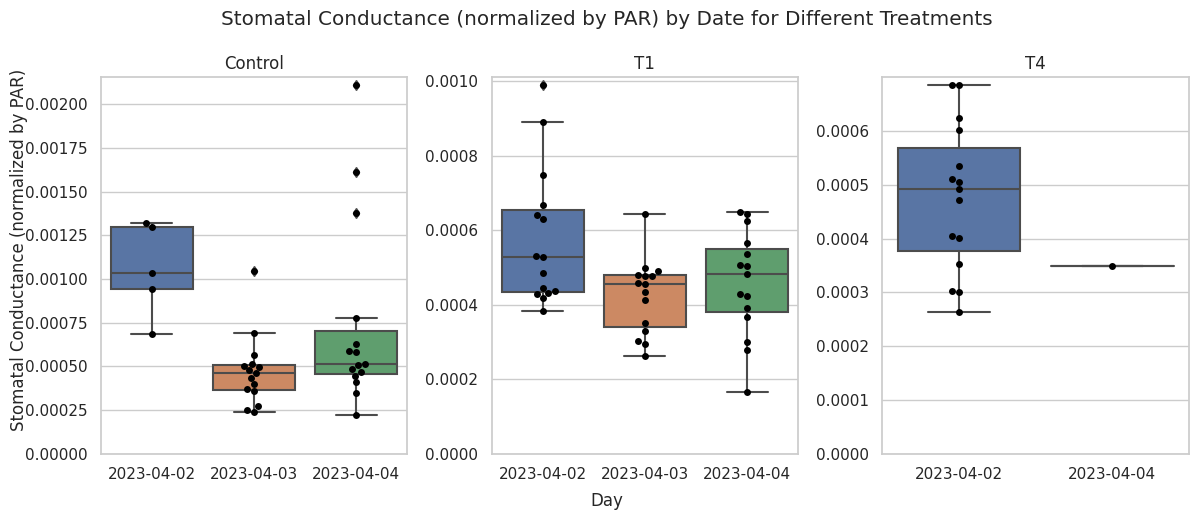

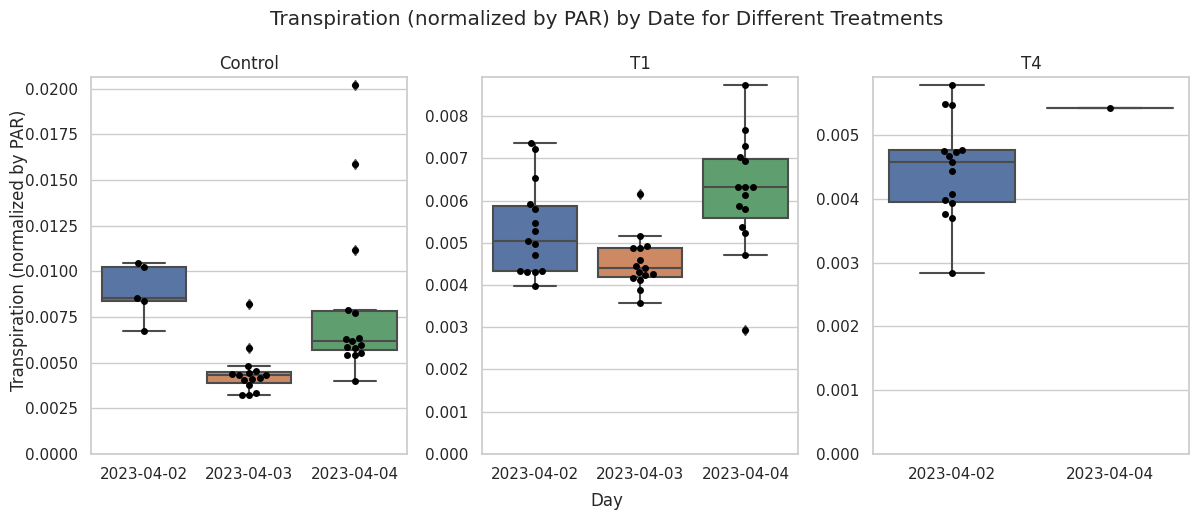

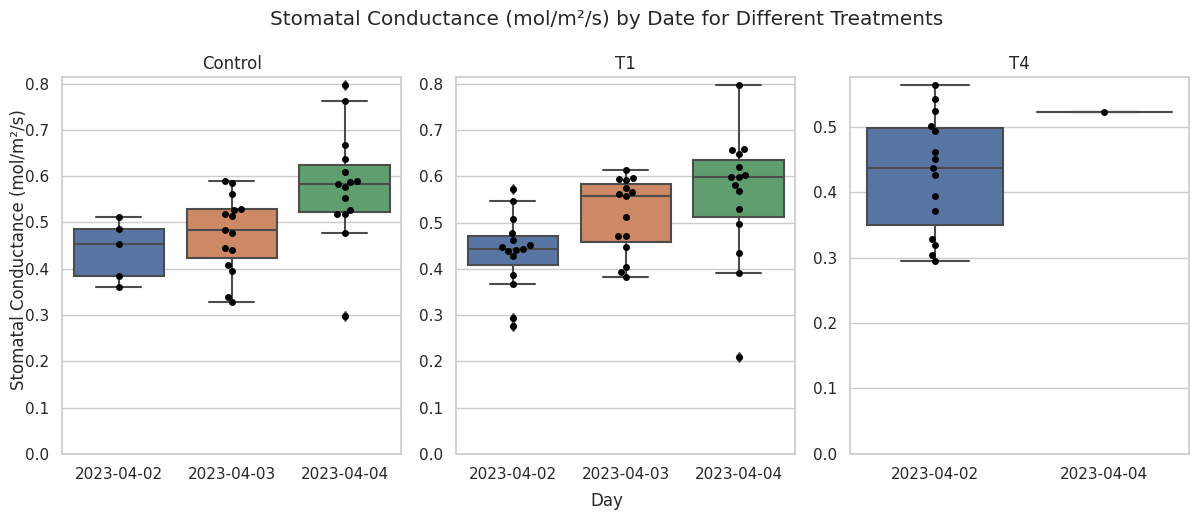

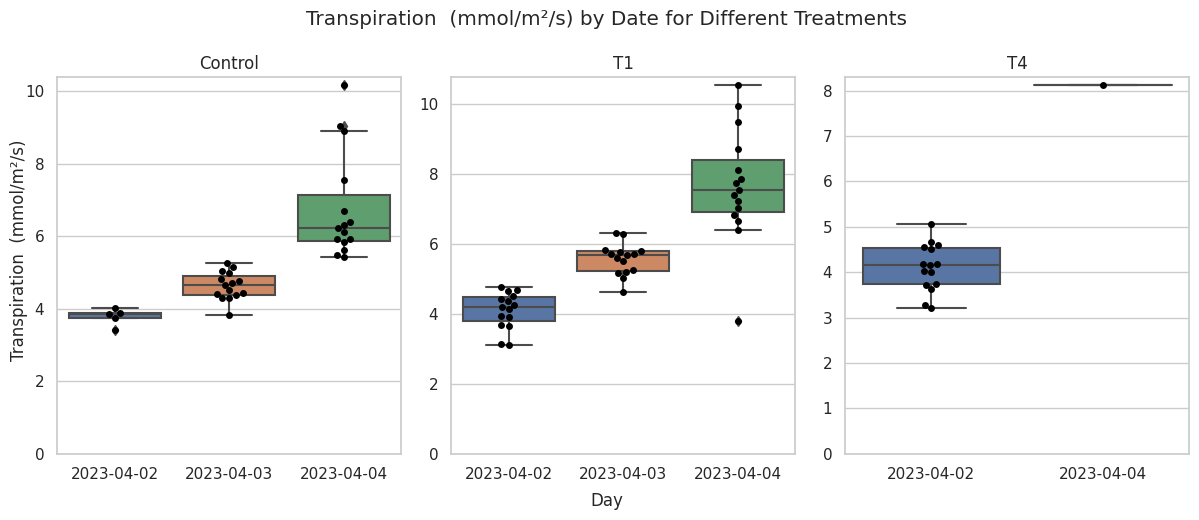

In [229]:
features = ['Stomatal Conductance (normalized by PAR)',
       'Transpiration (normalized by PAR)', 'Stomatal Conductance (mol/m²/s)',
       'Transpiration  (mmol/m²/s)']
for feature in features:
  boxplot_feature(df_ana_norm_mean, feature)

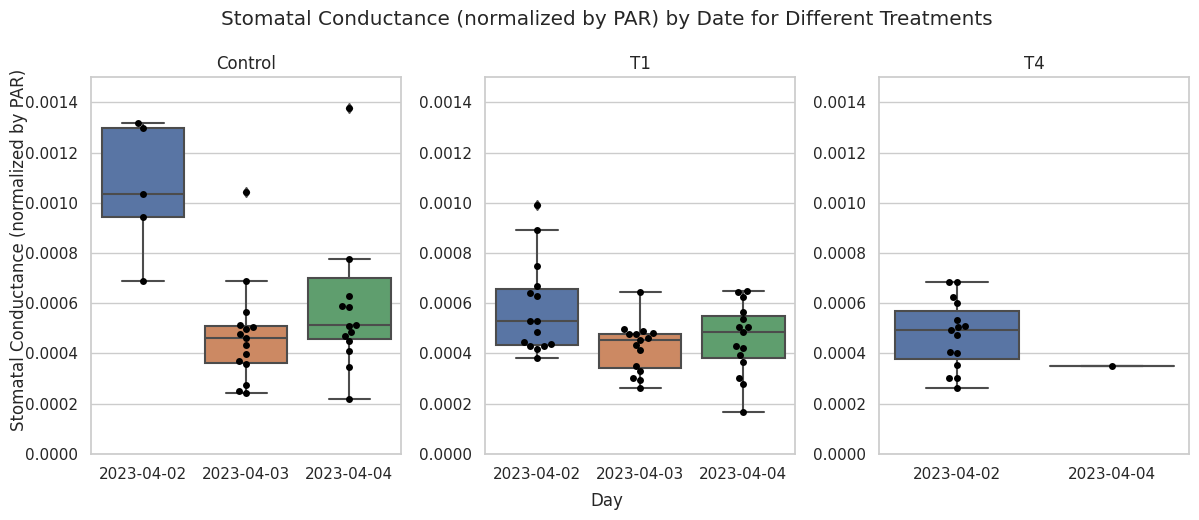

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# get unique treatments
treatments = sorted(df_ana_norm_mean.Treatment.unique())

# create subplot with the number of treatments as columns
fig, axs = plt.subplots(nrows=1, ncols=len(treatments), figsize=(4*len(treatments), 5))

# loop through treatments and create subplots
for i, treatment in enumerate(treatments):
  
  # filter data by treatment
  df_t = df_ana_norm_mean.copy().loc[df_ana_norm_mean['Treatment'] == treatment]

  # convert timestamp to date only
  df_t['Timestamp'] = pd.to_datetime(df_t['Timestamp']).dt.date

  # create boxplot and swarmplot in the corresponding subplot
  sns.boxplot(x='Timestamp', y='Stomatal Conductance (normalized by PAR)', data=df_t, ax=axs[i])
  sns.swarmplot(x='Timestamp', y='Stomatal Conductance (normalized by PAR)', data=df_t, color='black', ax=axs[i])
  axs[i].set_xticklabels(df_t['Timestamp'].unique()) #,rotation=90
  axs[i].set_title(f'{treatment}')
  axs[i].set_xlabel('')
  axs[i].set_ylabel('')
  axs[i].set_ylim(0, 0.0015)

#add a general xy-axis label
fig.text(0.01, 0.5, 'Stomatal Conductance (normalized by PAR)', ha='center', va='center', rotation='vertical')
fig.text(0.5, -0.02, 'Day', ha='center', va='bottom')


#add a general title for the entire figure
fig.suptitle('Stomatal Conductance (normalized by PAR) by Date for Different Treatments')

# adjust subplot spacing
fig.tight_layout()

# show plot
plt.show()


In [127]:
# grouped by treatment
df_treatment_mean = df_ana_norm_mean.groupby(['Treatment', 'Timestamp'])['Stomatal Conductance (normalized by PAR)', 'Transpiration (normalized by PAR)'].mean().reset_index()
df_treatment_mean_sorted = df_treatment_mean.sort_values(by='Timestamp')

df_treatment_mean_sorted

<ipython-input-127-c61dd74fa809>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_treatment_mean = df_ana_norm_mean.groupby(['Treatment', 'Timestamp'])['Stomatal Conductance (normalized by PAR)', 'Transpiration (normalized by PAR)'].mean().reset_index()


,Treatment,Timestamp,Stomatal Conductance (normalized by PAR),Transpiration (normalized by PAR)
0,Control,2023-04-02,0.001057,0.008863
3,T1,2023-04-02,0.000577,0.005305
6,T4,2023-04-02,0.000476,0.004469
1,Control,2023-04-03,0.000472,0.004444
4,T1,2023-04-03,0.000425,0.004531
2,Control,2023-04-04,0.000739,0.007976
5,T1,2023-04-04,0.000458,0.006181
7,T4,2023-04-04,0.000350,0.005433


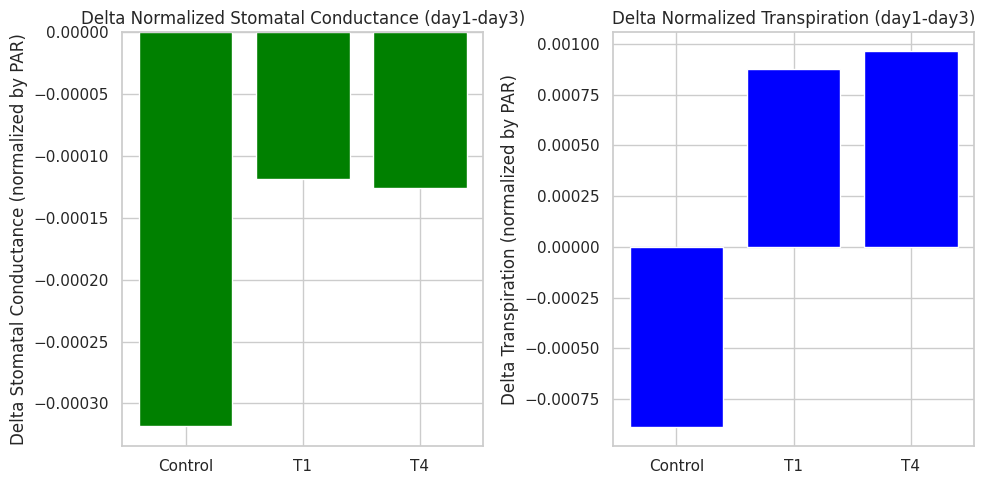

In [128]:
import numpy as np
import matplotlib.pyplot as plt
# create a new dataframe that only includes the rows for day 1 and day 3
df_day1_3 = df_treatment_mean_sorted[df_treatment_mean_sorted['Timestamp'].isin(['2023-04-02', '2023-04-04'])]

# create a pivot table to group the data by treatment and variable
df_pivot = df_day1_3.pivot(index='Treatment', columns='Timestamp')

# compute the delta between day 1 and day 3 for each variable and treatment
delta_gsw_norm = df_pivot['Stomatal Conductance (normalized by PAR)']['2023-04-04'] - df_pivot['Stomatal Conductance (normalized by PAR)']['2023-04-02']
delta_E_apparent_norm = df_pivot['Transpiration (normalized by PAR)']['2023-04-04'] - df_pivot['Transpiration (normalized by PAR)']['2023-04-02']

# create the figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# plot the delta gsw_norm values as a bar plot
axs[0].bar(delta_gsw_norm.index, delta_gsw_norm, color='green')
axs[0].set_title('Delta Normalized Stomatal Conductance (day1-day3)')
axs[0].set_ylabel('Delta Stomatal Conductance (normalized by PAR)')

# plot the delta E_apparent_norm values as a bar plot
axs[1].bar(delta_E_apparent_norm.index, delta_E_apparent_norm, color='blue')
axs[1].set_title('Delta Normalized Transpiration (day1-day3)')
axs[1].set_ylabel('Delta Transpiration (normalized by PAR)')

# adjust the spacing between subplots and display the plot
fig.tight_layout()
plt.show()

In [129]:
print(delta_gsw_norm)

Treatment
Control   -0.000318
T1        -0.000119
T4        -0.000126
dtype: float64


In [130]:
delta_E_apparent_norm

Treatment
Control   -0.000887
T1         0.000876
T4         0.000964
dtype: float64

##### old (bar plots)

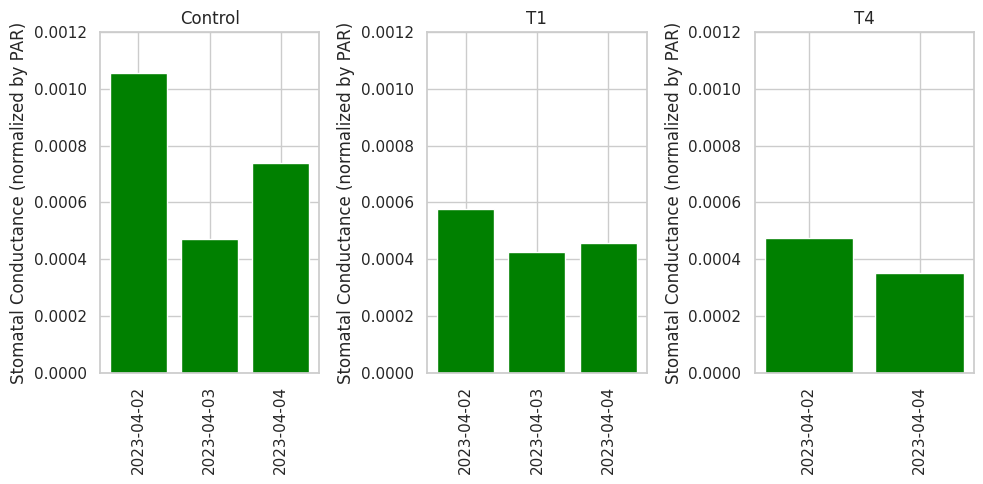

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def plot_treatment(df, treatment, feature, ax, y_lim, color):
    # filter the DataFrame to only include the specified treatment
    df_treatment = df[df['Treatment'] == treatment]

    # create a list of unique dates for the treatment
    treatment_dates = df_treatment['Timestamp'].unique()
    treatment_dates_str = [(datetime.utcfromtimestamp(date.tolist()/1e9)).strftime('%Y-%m-%d') for date in treatment_dates]

    # loop through each date and create a bar plot for the treatment
    for i, date in enumerate(treatment_dates):
        # filter the treatment DataFrame to only include the current date
        date_df = df_treatment[df_treatment['Timestamp'] == date]
        # get the gsw_norm value for the current date
        feature_data = date_df[feature].values[0]
        # plot the bar plot for the current date
        ax.bar(i, feature_data, color=color)

    # set the x-axis ticks and tick labels
    ax.set_xticks(range(len(treatment_dates)))
    ax.set_xticklabels(treatment_dates_str, rotation=90)
    ax.set_ylim([0, y_lim])
    # set the plot title and y-axis label
    ax.set_title(f'{treatment}')
    ax.set_ylabel(feature)

# create a list of treatments to plot
treatments = ['Control', 'T1', 'T4']

# create the figure and axis objects
fig, axs = plt.subplots(1, 3, figsize=(10,5))

# loop through each treatment and create a subplot for each one
for i, treatment in enumerate(treatments):
    # create the subplot for the current treatment
    ax = axs[i]
    # plot the treatment on the subplot
    plot_treatment(df_treatment_mean_sorted, treatment, 'Stomatal Conductance (normalized by PAR)', ax, y_lim=0.0012, color='green')


# adjust the spacing between subplots and display the plot
fig.tight_layout()
plt.show()

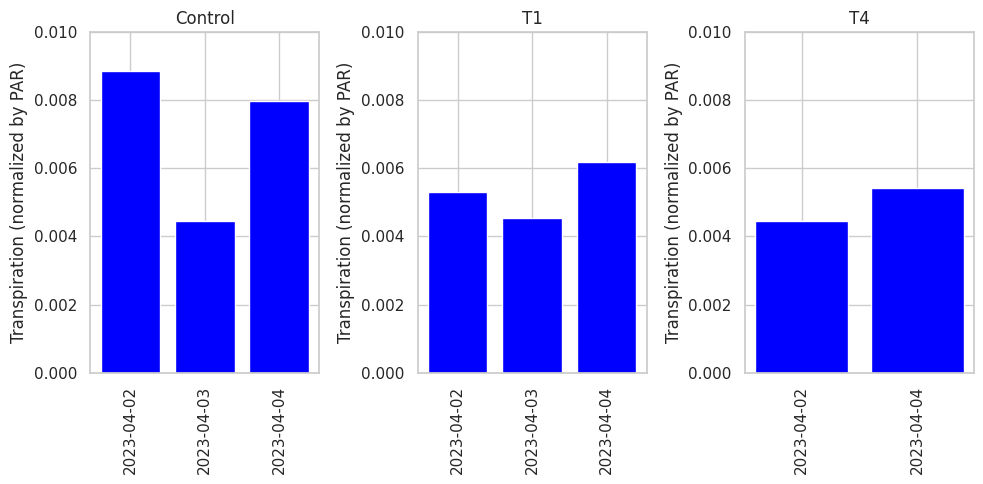

In [132]:
# create a list of treatments to plot
treatments = ['Control', 'T1', 'T4']

# create the figure and axis objects
fig, axs = plt.subplots(1, 3, figsize=(10,5))

# loop through each treatment and create a subplot for each one
for i, treatment in enumerate(treatments):
    # create the subplot for the current treatment
    ax = axs[i]
    # plot the treatment on the subplot
    plot_treatment(df_treatment_mean_sorted, treatment, 'Transpiration (normalized by PAR)', ax, y_lim=0.01, color='blue')

# adjust the spacing between subplots and display the plot
fig.tight_layout()
plt.show()

## TODO



*   Add t_leaf analysis
*   Understand the trends in the gsw and E before and after irrigation failures
*   Analyse thermal images

